In [ ]:
# Import libraries
import os, sys, logging
import gather_keys_oauth2 as Oauth2
import fitbit
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import psycopg2
from sqlalchemy import create_engine
from datetime import datetime, date, timedelta
import myfitnesspal
import numpy as np

In [ ]:
# Make Postgre connection
host="46.101.121.37"
port=5432
database="postgres"
user="maciejo95"
password="Starku990i!"
conn = psycopg2.connect(host=host,port=port,database=database, user=user, password=password)
# create a cursor
cur = conn.cursor()
# execute a statement
print('PostgreSQL database version:')
cur.execute('SELECT version()')
# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)
# create engine to connect to SQLAlchemy
engine = create_engine("postgresql://"+user+":"+password+"@"+host+":"+str(port)+"/"+database)

In [ ]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn, index_col=None):
    table = pd.read_sql_query(sql_query, database)
    return table

In [ ]:
# Select entire data from db
try:
    # Utilize the create_pandas_table function to create a Pandas data frame
    # Store the data as a variable
    df = create_pandas_table('''SELECT
                                    hr.date as datetime, 
                                    hr.*, 
                                    sleep.*,
                                    food.*,
                                    activities.*,
                                    body.*
                                FROM hr 
                                JOIN sleep ON sleep.date = hr.date
                                JOIN food ON food.date = hr.date
                                JOIN activities ON activities.date = hr.date
                                JOIN body ON body.date = hr.date
                                ORDER BY hr.date ASC''')
    df = df.drop(['date'], axis=1)
    print(df)
except Exception as exc:
    print("Error:")
    print(exc)

In [31]:
# Get column values
list(df.columns.values)

['datetime',
 'out_of_range_calories',
 'out_of_range_minutes',
 'fat_burn_calories',
 'fat_burn_minutes',
 'cardio_calories',
 'cardio_minutes',
 'peak_calories',
 'peak_minutes',
 'resting_hr',
 'total_in_bed_minutes',
 'total_asleep_minutes',
 'total_awake_minutes',
 'total_sleep_efficiency',
 'total_deep_sleep_minutes',
 'total_light_sleep_minutes',
 'total_rem_sleep_minutes',
 'total_wake_minutes',
 'total_sleep_recordings',
 'calories_total',
 'calories_breakfast',
 'calories_lunch',
 'calories_dinner',
 'calories_snack1',
 'calories_snack2',
 'carbohydrates_total',
 'carbohydrates_breakfast',
 'carbohydrates_lunch',
 'carbohydrates_dinner',
 'carbohydrates_snack1',
 'carbohydrates_snack2',
 'fat_total',
 'fat_breakfast',
 'fat_lunch',
 'fat_dinner',
 'fat_snack1',
 'fat_snack2',
 'protein_total',
 'protein_breakfast',
 'protein_lunch',
 'protein_dinner',
 'protein_snack1',
 'protein_snack2',
 'sodium_total',
 'sodium_breakfast',
 'sodium_lunch',
 'sodium_dinner',
 'sodium_snack1

In [49]:
# Data-types of all columns
[print(datatype) for datatype in df.dtypes]

object
float64
int64
float64
int64
float64
int64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
float64
int64
int64
int64
int64
float64
float64
float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

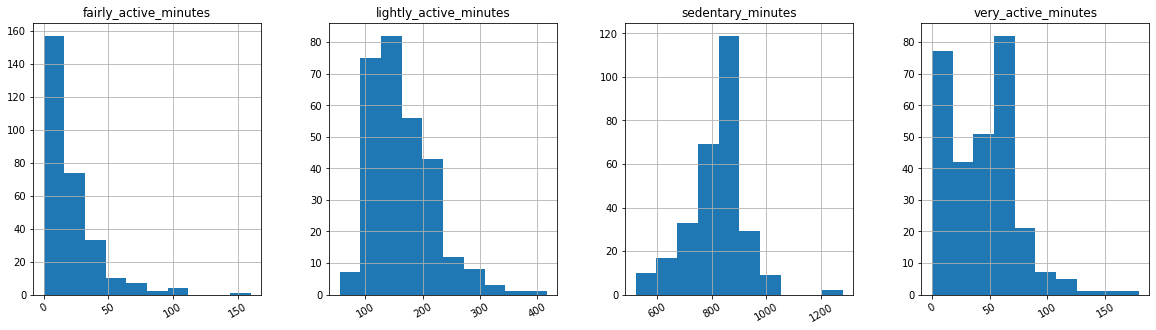

In [43]:
# Histogram for activities
h = df.hist(figsize = (20,5), layout = (1,4), xrot = 30, column=['sedentary_minutes','lightly_active_minutes','fairly_active_minutes','very_active_minutes'])

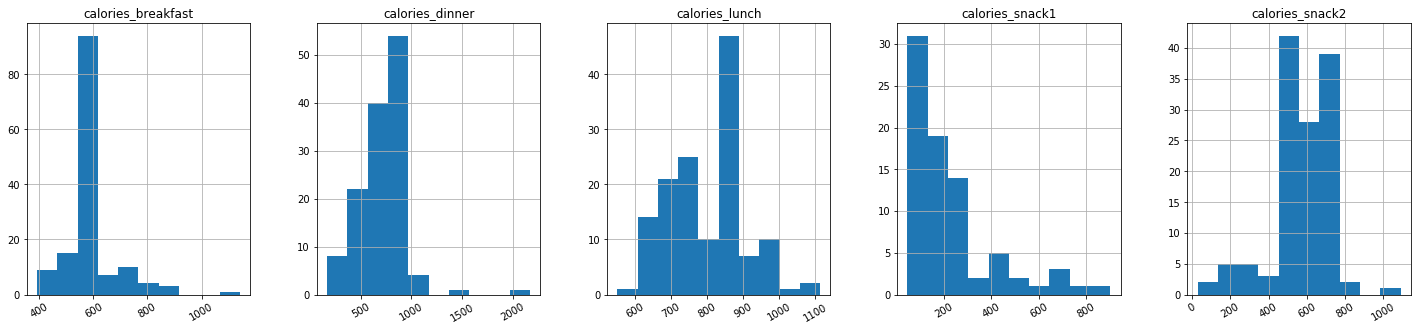

In [42]:
# Histogram for food-calories
h = df.hist(figsize = (30,5), layout = (1,6), xrot = 30, column=[
'calories_breakfast',
'calories_lunch',
'calories_dinner',
'calories_snack1',
'calories_snack2',])

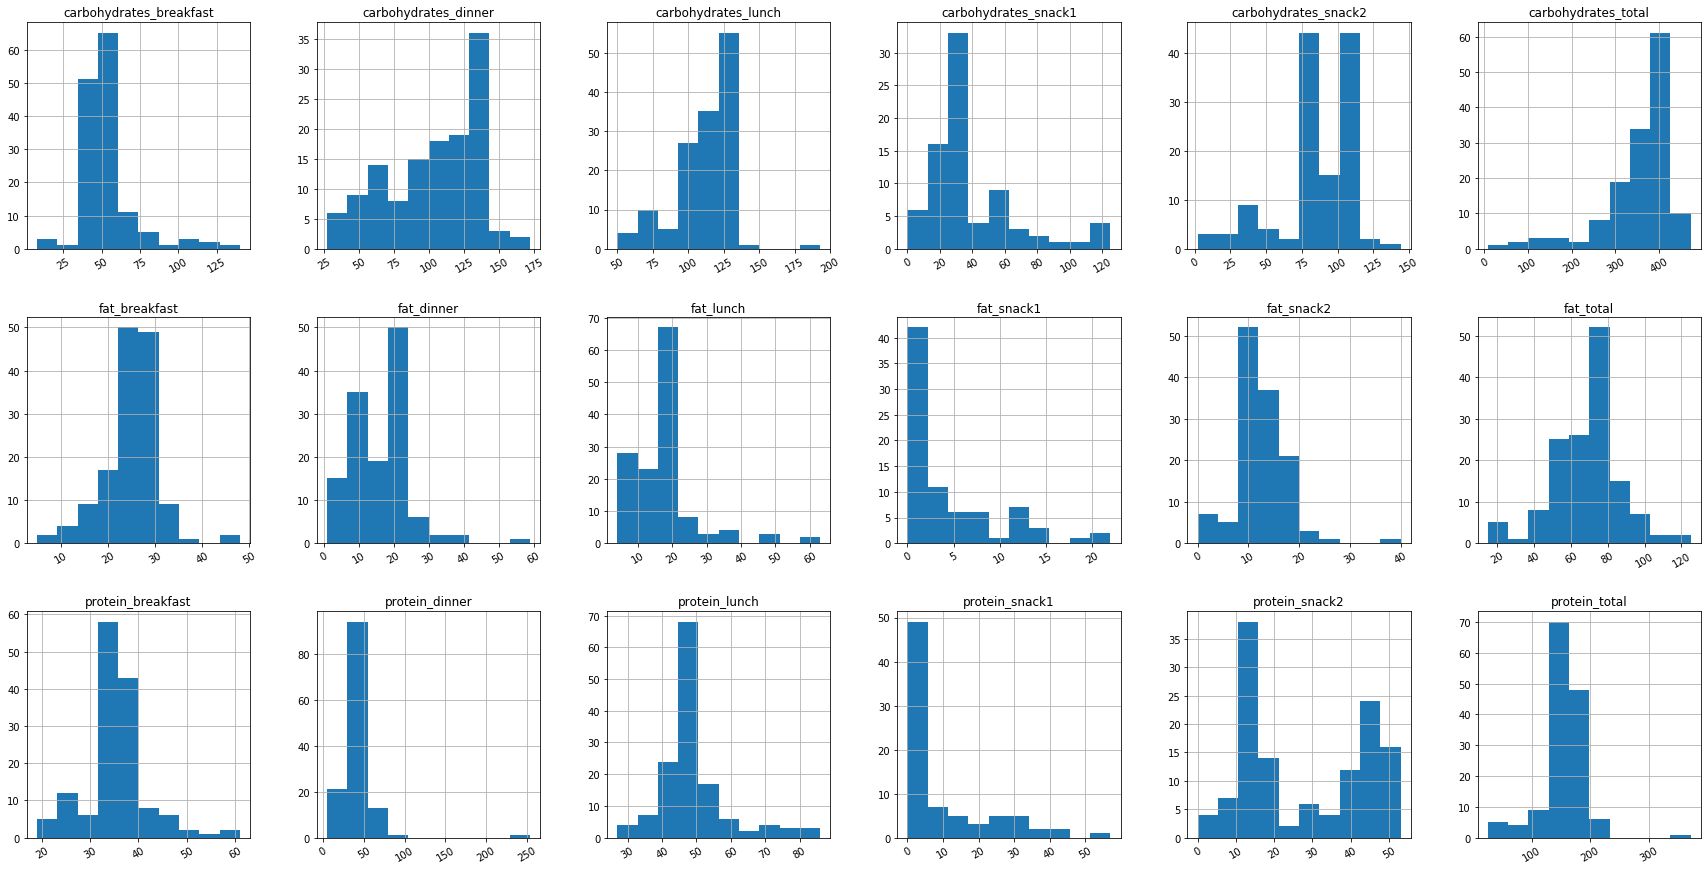

In [39]:
# Histogram for food-macros
h = df.hist(figsize = (30,15), layout = (3,6), xrot = 30, column=[
 'carbohydrates_total',
 'carbohydrates_breakfast',
 'carbohydrates_lunch',
 'carbohydrates_dinner',
 'carbohydrates_snack1',
 'carbohydrates_snack2',
 'fat_total',
 'fat_breakfast',
 'fat_lunch',
 'fat_dinner',
 'fat_snack1',
 'fat_snack2',
 'protein_total',
 'protein_breakfast',
 'protein_lunch',
 'protein_dinner',
 'protein_snack1',
 'protein_snack2'])

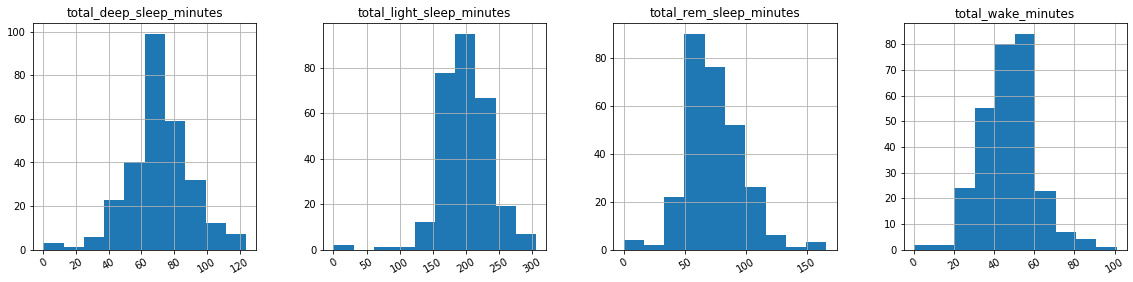

In [40]:
# Histogram for sleep
h = df.hist(figsize = (30,15), layout = (3,6), xrot = 30, column=[
'total_deep_sleep_minutes',
'total_light_sleep_minutes',
'total_rem_sleep_minutes',
'total_wake_minutes'])

In [66]:
df_subset = df[[
 'out_of_range_minutes',
 'fat_burn_minutes',
 'cardio_minutes',
 'peak_minutes',
 'resting_hr',
 'total_sleep_efficiency',
 'steps',
 'distance']]
 

In [68]:
df_subset_no_nulls = df_subset.fillna(0)

In [69]:
is_null_list = df_subset_no_nulls.isnull().any(axis=1)

Error:
'DataFrame' object has no attribute 'as_matrix'


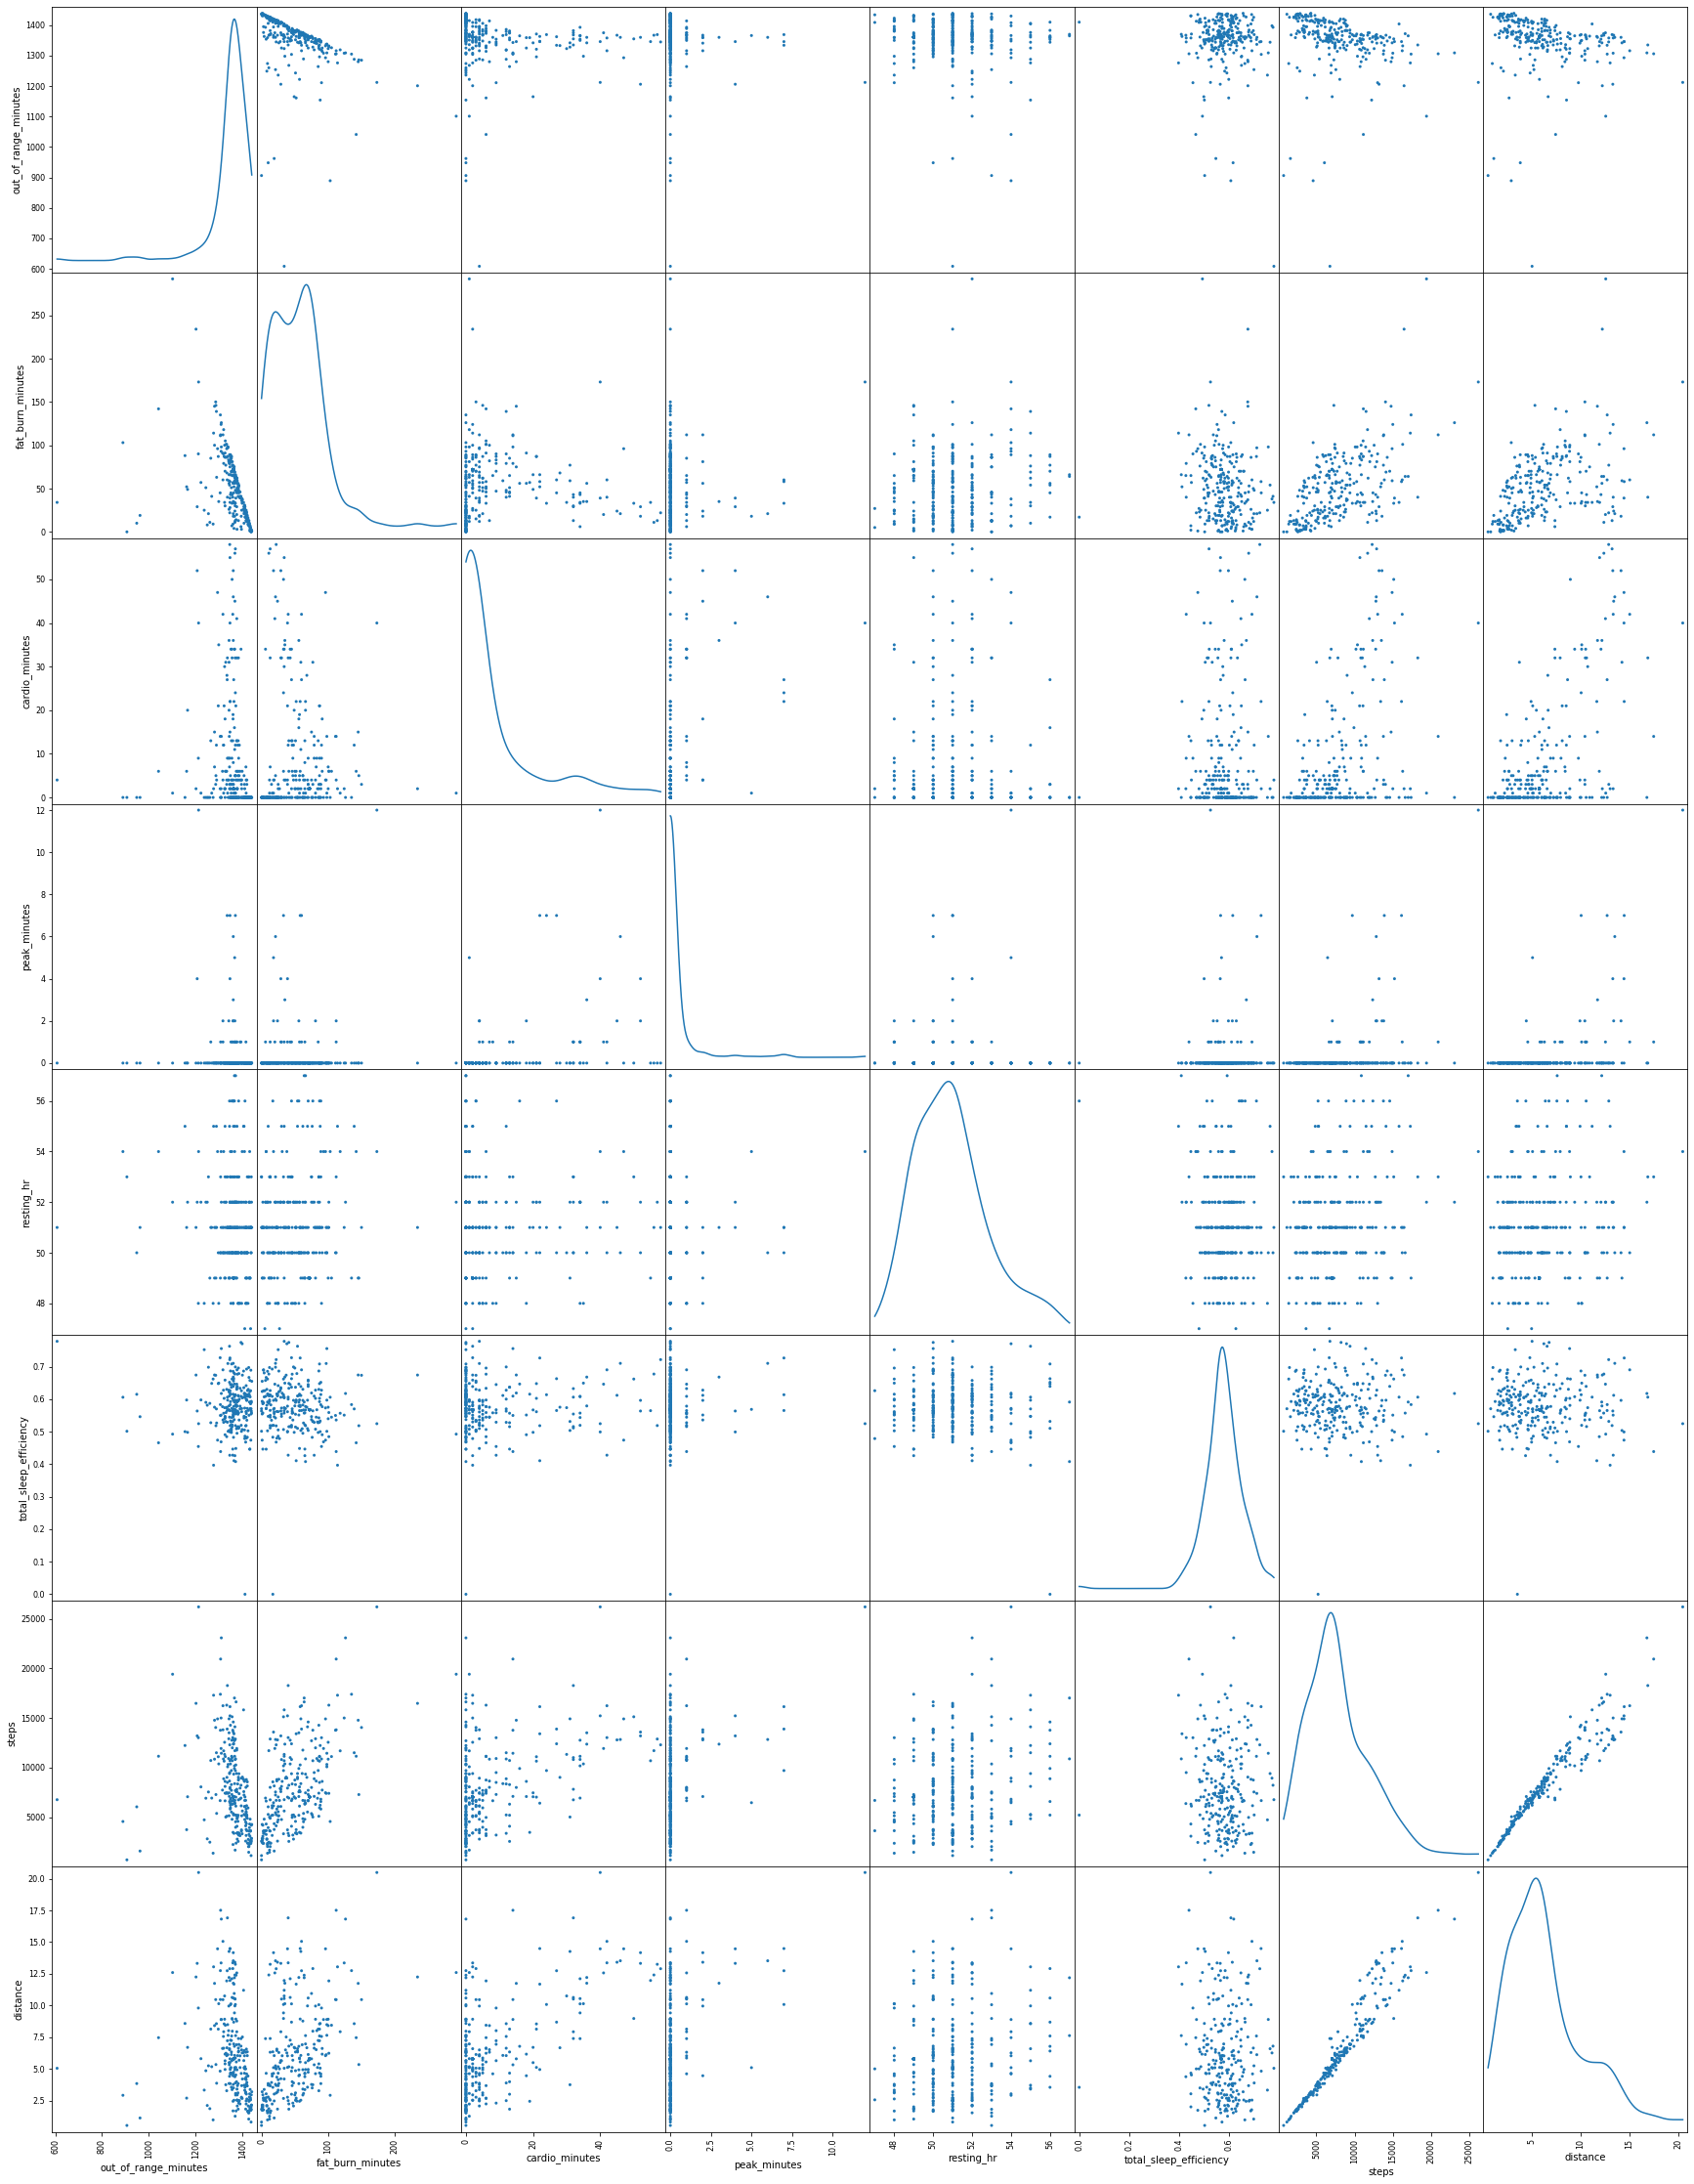

In [71]:
# Look for corelations
# Select entire data from db
try:
    axes = pd.plotting.scatter_matrix(df_subset_no_nulls, figsize = (30,40), alpha=1.0, diagonal='kde')
    corr = df_subset_no_nulls.corr().as_matrix()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
except Exception as exc:
    print("Error:")
    print(exc)
